In [1]:
#Bibliotecas utilizadas para classificação e exportação da árvore gerada
from sklearn.tree import DecisionTreeClassifier, export_graphviz
#Biblioteca para facilitar a separação dos dataset em dados de traino e teste
from sklearn.model_selection import train_test_split
#Pandas é uma biblioteca que facilita a ingestão e manipulação de dados
import pandas as pd
import seaborn as sns
sns.set(color_codes=True)

#suprimindo warning para não poluir a tela ao utilizar algumas bibliotecas como o seaborn
import warnings
warnings.filterwarnings('ignore')

#enabling to plot using plotlib in the notebook
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Para carregar o data set utilizaremos a biblioteca pandas.

In [2]:
df = pd.read_csv("dataset/iris.data.csv")

In [3]:
df.head()

,sepala-C,sepala-L,petala-C,petala-L,rotulo
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.tail()

,sepala-C,sepala-L,petala-C,petala-L,rotulo
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


Vamos utilizar a biblioteca seaborn para visualizar a distribuição das espécies de plantas para cada atributo.

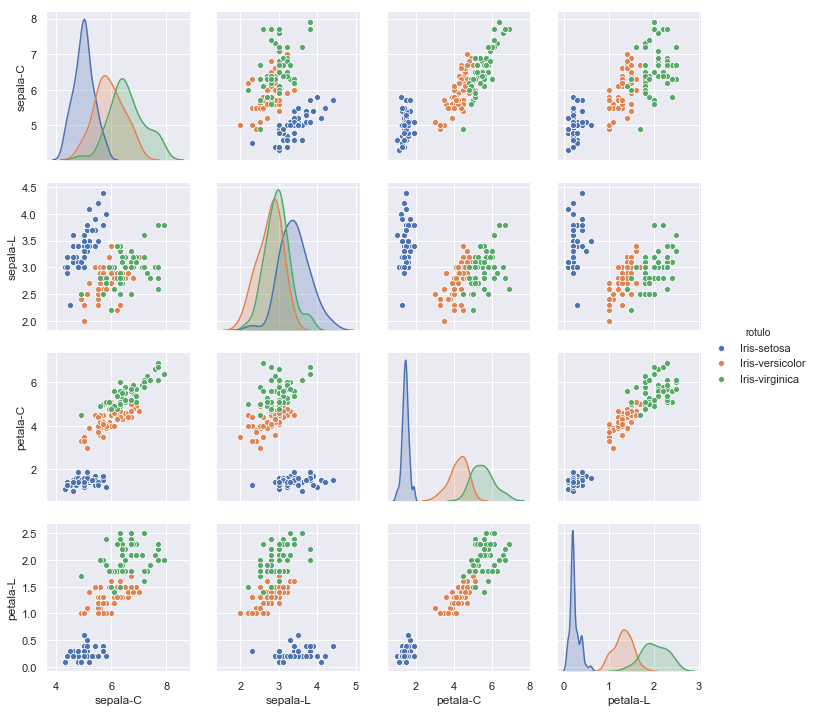

In [5]:
sns.pairplot(df,hue="rotulo")

Podemos observar que o comprimento e largura da pétala consegue ser um ótimo separador para a Iris do tipo setosa, muito provável que será o primeiro atributo da árvore de decisão.

In [6]:
#visualizando as colunas
df.columns

Index(['sepala-C', 'sepala-L', 'petala-C', 'petala-L', 'rotulo'], dtype='object')

Para prepara-los para o treinamento devemos separar as colunas de atributos (X) da coluna dos rotulos (Y)

In [7]:
#filtrando apenas no nome das colunas que são features para extrair os dados para treinamento
nome_atributos = list( df.columns[:4] )
nome_atributos

['sepala-C', 'sepala-L', 'petala-C', 'petala-L']

In [8]:
X = df[nome_atributos]
X[:5] #vizualizar os 5 primeiros registros

,sepala-C,sepala-L,petala-C,petala-L
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [9]:
#Retorna a coluna com os nomes das plantas
Y_rotulos = df[df.columns[4]]
nome_iris = Y_rotulos.unique()
nome_iris

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [10]:
#Criando um novo dataframe substituindo os nomes por valores númericos
df_num = df.replace({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2})
df_num.head()

,sepala-C,sepala-L,petala-C,petala-L,rotulo
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [25]:
df_num.tail()

,sepala-C,sepala-L,petala-C,petala-L,rotulo
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [26]:
Y = df_num[df_num.columns[4]]
Y[:5] #verificando se os dados foram substituidos e selecionados corretamente

0    0
1    0
2    0
3    0
4    0
Name: rotulo, dtype: int64

Vamos separar em conjunto de traino e teste, nesse caso não iremos realizar o passo de <i>"tunning"</i> do classificador, então não precisamos separar em um terceiro conjunto de dados chamado validação.<br>
A função train_test_split separa o conjunto em treino e teste respeitando a proporção passada via parametro <b>test_size</b>.<br>
A seleção dos dados de cada conjunto é pseudo-aleatória e o parametro <b>random_state</b> permite que seja gerado sempre o mesmo conjunto, isso é importante para fins de comparação entre um algoritmo e outro, ou configurações diferentes para o mesmo algoritmo.

In [23]:
#vamos utilizar 30% dos dados para ser o conjunto de teste ficando 70% dos dados para treino
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y,test_size=0.3,random_state=30)

In [14]:
X_treino[:5]

,sepala-C,sepala-L,petala-C,petala-L
59,5.2,2.7,3.9,1.4
94,5.6,2.7,4.2,1.3
73,6.1,2.8,4.7,1.2
89,5.5,2.5,4.0,1.3
88,5.6,3.0,4.1,1.3


In [15]:
Y_treino[:5]

59    1
94    1
73    1
89    1
88    1
Name: rotulo, dtype: int64

In [16]:
X_teste[:5]

,sepala-C,sepala-L,petala-C,petala-L
20,5.4,3.4,1.7,0.2
5,5.4,3.9,1.7,0.4
3,4.6,3.1,1.5,0.2
101,5.8,2.7,5.1,1.9
82,5.8,2.7,3.9,1.2


In [17]:
Y_teste[:5]

20     0
5      0
3      0
101    2
82     1
Name: rotulo, dtype: int64

In [30]:
#Carregando classificador de árvore de decisão
classificador = DecisionTreeClassifier()
#Treinando o modelo de classificação baseado em decision tree
classificador.fit(X_treino, Y_treino)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

Após treinado podemos verificar o <i>score</i> no conjunto de treinamento e no conjunto de testar, para verificar se o modelo generaliza bem e não possui <i>overfiting</i>.<br>
Caso o <i>score</i> dos dados de treinamento seja próximo ao dos dados de teste então o modelo generaliza bem e não possui <i>overfiting</i>.

In [31]:
score_treino = classificador.score(X_treino,Y_treino)
score_treino

1.0

In [20]:
score_teste = classificador.score(X_teste,Y_teste)
score_teste

0.9777777777777777

In [33]:
import graphviz
dot_graph = export_graphviz(classificador, out_file='iris.dot')
with open("iris.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph).view()

'Source.gv.pdf'